<center><h1>  Fire Damage Assessment with Sentinel- 3 </h1></center>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
from matplotlib import pyplot as plt # Visualization
import cartopy.crs as ccrs # Projected visualizations
import xarray as xr # Open, read and Process netCDF files
import numpy as np # Data manupulation
import cartopy # improved visualizations
from glob import iglob # data access in file manager
import glob   # data access in file manager
from os.path import join # data access in file manager
import pandas as pd # data manipulation
#import harp #Python interface of the atmospheric toolbox to open read and process Sentinel-5P products
import imageio # create gif 
import matplotlib.dates as mdates # date manipulation
import matplotlib.patches as mpatches # to define patches (2D artist with a face color and an edge color such as rectangle, circles)
from matplotlib.dates import DateFormatter # date manipulation
import datetime #create datetime object
import time #to manipulate time in Python and create timer

In [2]:
# Define your data directory Rootpath and your filename FName
file_path = 'C:\\WinPython38\\NBR_collocation_20210728_20210809.nc'

In [3]:
NBR_collocate=xr.open_dataset(file_path)
NBR_collocate

<xarray.Dataset>
Dimensions:                                                                                                                       (x: 1664, y: 1154)
Coordinates:
    lat                                                                                                                           (y, x) float64 ...
    lon                                                                                                                           (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    NBR_20210728                                                                                                                  (y, x) float32 ...
    NBR_20210731                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210731_S3A_S3B_SL_1_RBT                                                                                (y, x) int8 ...
    NBR_20210730                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210730_S3A_SL_1_RBT____20210730T075750_20210730T080050_20210731T163142_0179_074_306_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210801                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210801_S3B_SL_1_RBT____20210801T080707_20210801T081007_20210802T200613_0180_055_192_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210729                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210729_S3A_SL_1_RBT____20210729T082401_20210729T082701_20210730T164959_0179_074_292_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210803                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210803_S3A_SL_1_RBT____20210803T075405_20210803T075705_20210804T193303_0179_074_363_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210804                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210804_S3B_SL_1_RBT____20210804T082933_20210804T083233_20210805T192129_0179_055_235_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210802                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210802_S3A_SL_1_RBT____20210802T082016_20210802T082316_20210803T171626_0179_074_349_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210805                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210805_S3B_SL_1_RBT____20210805T080323_20210805T080623_20210806T164116_0179_055_249_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210806                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210806_S3A_SL_1_RBT____20210806T081630_20210806T081930_20210807T160928_0179_075_021_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210808                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210808_S3B_SL_1_RBT____20210808T082549_20210808T082849_20210809T202332_0180_055_292_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210809                                                                                                                  (y, x) float32 ...
    collocationFlags_NBR_20210809_S3B_SL_1_RBT____20210809T075938_20210809T080238_20210810T195015_0179_055_306_2340_LN2_O_NT_004  (y, x) int8 ...
    NBR_20210807                                                            

In [4]:
#Time dimension
#Create the date vector to loop on the files
dt = datetime.datetime(2021, 7, 29) #initialize dt at the first day after the reference date
end = datetime.datetime(2021, 8, 9) #our time period stops on 09/08/2021
step = datetime.timedelta(days=1) #set the timedelta to one day #time step
dates = [] #initialize an empty array for dates
dates_title=[] #initialize an empty array for dates_title
while dt <= end: 
    dates.append(dt.strftime('%Y%m%d')) #Add the current day to the dates array
    dates_title.append(dt.strftime('%d/%m/%Y')) #Add the current day to the dates_title array
    dt += step #jump to the next day
#Display the date vector    
dates

['20210729',
 '20210730',
 '20210731',
 '20210801',
 '20210802',
 '20210803',
 '20210804',
 '20210805',
 '20210806',
 '20210807',
 '20210808',
 '20210809']

In [5]:
#Display date_title
dates_title

['29/07/2021',
 '30/07/2021',
 '31/07/2021',
 '01/08/2021',
 '02/08/2021',
 '03/08/2021',
 '04/08/2021',
 '05/08/2021',
 '06/08/2021',
 '07/08/2021',
 '08/08/2021',
 '09/08/2021']

In [6]:
#Define the reference date (you can change it later on if you wish to
ref_date='20210728'
#for loop on the dates list
for date in dates:
    #dNBR computation wrt NBR values for the ref_date
    NBR_collocate=NBR_collocate.assign(dNBR=NBR_collocate['NBR_{}'.format(ref_date)]-NBR_collocate['NBR_{}'.format(date)])
    #RBR computation wrt NBR values for the ref_date
    NBR_collocate=NBR_collocate.assign(RBR=NBR_collocate['dNBR']/(NBR_collocate['NBR_{}'.format(ref_date)]+1.001))
    #RBR is computed, drop the dNBR and NBR_date variables
    NBR_collocate=NBR_collocate.drop(['dNBR','NBR_{}'.format(date)])
    #Rename the variables with the current date
    NBR_collocate=NBR_collocate.rename({'RBR':'RBR_{}_{}'.format(ref_date,date)})

#drop the collocationFlags and the NBR_ref_date
keys_to_drop=list(NBR_collocate.keys())
keys=list(NBR_collocate.keys())
for key in keys:
    if key.startswith('RBR_'):
        keys_to_drop.remove(key)
        
NBR_collocate=NBR_collocate.drop(keys_to_drop)

In [7]:
# Display the DataSet 'NBR_collocate'
NBR_collocate

<xarray.Dataset>
Dimensions:                (x: 1664, y: 1154)
Coordinates:
    lat                    (y, x) float64 ...
    lon                    (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    RBR_20210728_20210729  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210730  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210731  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210801  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210802  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210803  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210804  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210805  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210806  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210807  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210808  (y, x) float32 nan nan nan nan ... nan nan nan nan
    RBR_20210728_20210809  (y, x) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.4
    TileSize:     580:416
    start_date:   28-JUL-2021 08:12:07.473210
    stop_date:    28-JUL-2021 08:12:07.473210

In [8]:
def subplot_region(data:xr.DataArray,ax:plt.subplot,lon_min:float,lon_max:float,lat_min:float,lat_max:float,color:str):
    """
    Creates a contour plot of the RBR computed from S3 L1B products. The color levels are defined within the function. 
    Args:
        (xarray_dataarray) data, RBR from S3 L1B (it must have 'lon' and 'lat' as coordinates)
        (subplot) ax, supblot instance with a defined projection
        (float) lon_min,lon_max,lat_min,lat_max: coordinates of the area of interest
        (str) color: color of the plot frame
    Returns:
        (subplot) contourf plot of the RBR over the specified region
    """
    # RBR levels and associated colors for the contour plot, feel free to change them if needed
    level=[-0.500,-0.250,-0.100,0.130,0.270,0.440,0.660,1.300]
    colors=['b','c','forestgreen','y','orange','r','m']
    
    im=data.plot.contourf(ax=ax, x='lon', y='lat',\
                          add_colorbar=False, extend='neither', colors=colors, transform=ccrs.PlateCarree(), levels=level)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    #Define the subplot frame colour and linewidth
    ax.outline_patch.set_edgecolor(color)
    ax.outline_patch.set_linewidth(3)
    ax.coastlines('10m',linewidth=2)
    ax.gridlines
    return ax

In [8]:
#Coordinates of the global area of interest (Southern Turkey)
lon_min,lon_max=27.6,34
lat_min,lat_max=35.8,37.8

#Coordinates of the south western area affected by wildfires
lon_min_west,lon_max_west=27.65,29
lat_min_west,lat_max_west=36.3,37.6

#Coordinates of the south central area affected by wildfires
lon_min_centre,lon_max_centre=31.1,32.2
lat_min_centre,lat_max_centre=36.5,37.5

#Coordinates of the south eastern area affected by wildfires
lon_min_east,lon_max_east=32.75,33.9
lat_min_east,lat_max_east=35.85,36.85


# RBR levels and associated colors for the contour plot
level=[-0.500,-0.250,-0.100,0.130,0.270,0.440,0.660,1.300]
colors=['b','c','forestgreen','y','orange','r','m']


Visualisation of the burned area over Turkey

In [ ]:
#loop on the days to automate the figure generation
for date,date_title in zip(dates,dates_title):

    #Figure initialisation
    fig,ax=plt.subplots(1,1,figsize=(25,40)) #2 lines, 3 columns 
    #ax0 on the first line, will hold the global area of interest with the cartopy Plate Carree projection
    ax0=plt.subplot(2,1,1,projection=ccrs.PlateCarree())

    # RBR contour plot of the global area of interest
    im0=NBR_collocate['RBR_{}_{}'.format(ref_date,date)].plot.contourf(ax=ax0, x='lon', y='lat',\
                                                                   add_colorbar=False, extend='neither',\
                                                                   colors=colors, transform=ccrs.PlateCarree(), levels=level)
    #Set the extent of the subplot to the area of interest
    ax0.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    #add coastlines
    ax0.coastlines('10m',linewidth=2)
    #add gridlines
    gl0=ax0.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0.5,)
    gl0.xlabels_top = False
    gl0.ylabels_left = False
    #Add three rectangles over the smaller areas of interest
    #South East area = red
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_east, lat_min_east], 
                                      width=lon_max_east-lon_min_east, height=lat_max_east-lat_min_east, 
                                      edgecolor='red', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    #South central area = blue
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_centre, lat_min_centre], 
                                      width=lon_max_centre-lon_min_centre, height=lat_max_centre-lat_min_centre, 
                                      edgecolor='blue', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    #South West area = indigo
    ax0.add_patch(mpatches.Rectangle(xy=[lon_min_west, lat_min_west], 
                                      width=lon_max_west-lon_min_west, height=lat_max_west-lat_min_west, 
                                      edgecolor='indigo', facecolor='None', linewidth=2,
                                      transform=ccrs.PlateCarree()))
    
    #Title definition
    #title='RBR values between {} and {}'.format(ref_date_title,date_title)
    title='Burned area extent and severity on {}'.format(date_title)
    fig.suptitle(title,fontsize=35,y=0.62)
    
    #colour bar definition
    #color bar will be associated to the main plot, horizontally positioned
    cbar=fig.colorbar(im0, ax=ax0, pad=0.1, format='%.2f', orientation="horizontal", shrink=0.8)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(label='Burn severity level',fontsize=25)
    # Write class names within the color bar
    cbar.ax.get_yaxis().set_ticks([])
    j=0
    classes=['High regrowth', 'Low regrowth', 'Unburned', 'Low severity', 'Moderate - low severity',\
             'Moderate - high severity', 'High severity']
    for legend in classes:
        cbar.ax.text((2 * j + 1) / 14, .5, legend, ha='center', va='center', fontsize=12, transform=cbar.ax.transAxes)
        j+=1

    fig.subplots_adjust(wspace=0.05,hspace=0.01,top=0.6)


    # Saving the fig
    plt.savefig('C:\\WinPython38\\RBR_{}_{}.png'.format(ref_date,date),\
                facecolor='white', bbox_inches='tight', dpi=300)    
    # to avoid seeing all images
    #plt.close()

Animation of the burned area extent evolution

In [10]:
# modules
import imageio
from pathlib import Path
from IPython.display import Image

In [11]:
# Search image files
image_path = Path('C:\\WinPython38\\WPy64-3870\\notebooks\\Fire_Turkey_1021\\Processing\\S3_SL_1\\figures\\')
images = sorted(glob.glob(join(image_path,'RBR_*.png')))
image_list = []
for file_name in images:
    image_list.append(imageio.imread(file_name))

In [12]:
# Save the GIF
imageio.mimwrite('C:\\WinPython38\\animated_RBR.gif', image_list,duration=2,loop=2)

In [ ]:
## Visualisation
with open('C:\\WinPython38\\animated_RBR.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [15]:
#Burned area time series computation

#empty list creation to store the number of pixels having RBR>0.13 for each day and to compute the burned area
counts=[]
areas=[]
#mask to further restrict the area of interest to South Turkey as this is where the main fires broke out
mask_area = (
    (NBR_collocate['lon'] >= 27)
    & (NBR_collocate['lon'] <= 34)
    & (NBR_collocate['lat']>=35.85)
    & (NBR_collocate['lat']<=37.6)
    )
#Select the pixels satisfying the mask conditions
interest=NBR_collocate.where(mask_area,np.nan)
#Loop over the dates
for date in dates:
    #Filtered will be set to NaN if RBR<0.13 and to the RBR value if RBR>=0.13
    filtered=interest['RBR_{}_{}'.format(ref_date,date)].where(interest['RBR_{}_{}'.format(ref_date,date)]>=0.13,np.nan)
    #Number of non NaN pixels in filterd
    count=filtered.count()
    counts.append(int(count.values))
    #SLSTR has a ground resolution of 500m so each pixel roughly covers 0.025km²
    area=count*0.5*0.5
    areas.append(float(area.values))

In [16]:
#Display the daily burnt areas 
areas

[737.0,
 861.5,
 1139.25,
 924.25,
 1224.0,
 1197.25,
 1105.5,
 1456.75,
 1576.25,
 735.25,
 1324.5,
 1350.75]

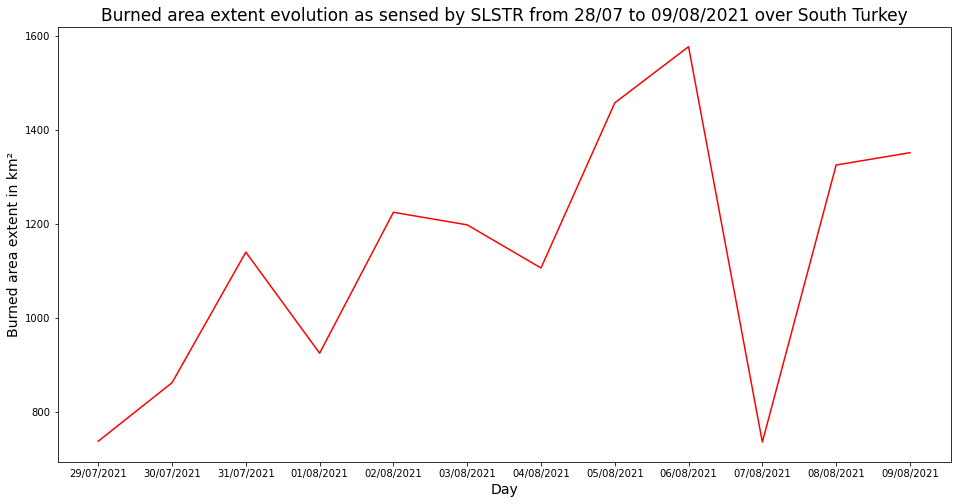

In [17]:
#Plot the burned area evolution in km²

fig,axe=plt.subplots(1,1, figsize=(16,8))
axe.plot(dates_title,areas, 'red')
axe.set_ylabel('Burned area extent in km²', fontsize=14)
axe.set_xlabel('Day', fontsize=14)
axe.set_title('Burned area extent evolution as sensed by SLSTR from 28/07 to 09/08/2021 over South Turkey',fontsize=17) # add title
# Save the plot
plt.savefig('/shared/Fire_Turkey_1021/Processing/S3_SL_1/figures/Burned_area_time_series.png', facecolor='white',\
            bbox_inches='tight', dpi=300)